enter the name of the file with extension:  listings Portland.csv


                 id       host_id     latitude    longitude        price  \
count  1.918000e+03  1.918000e+03  1918.000000  1918.000000  1918.000000   
mean   2.329056e+17  7.782918e+07    45.527287  -122.648076   111.667362   
std    3.675154e+17  1.015442e+08     0.035068     0.043830    46.882809   
min    6.167700e+04  1.618000e+03    45.436120  -122.763890    30.000000   
25%    2.038846e+07  8.207605e+06    45.502673  -122.678495    78.000000   
50%    3.984459e+07  3.077901e+07    45.525992  -122.646045   100.000000   
75%    6.230608e+17  1.117970e+08    45.556381  -122.619242   138.000000   
max    1.043880e+18  4.211279e+08    45.615210  -122.539840   260.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count     1918.000000        1918.000000        1918.000000   
mean         2.094891          92.626694           2.251084   
std          1.245698          82.379704           1.506018   
min          1.000000           1.000000           0.010000   


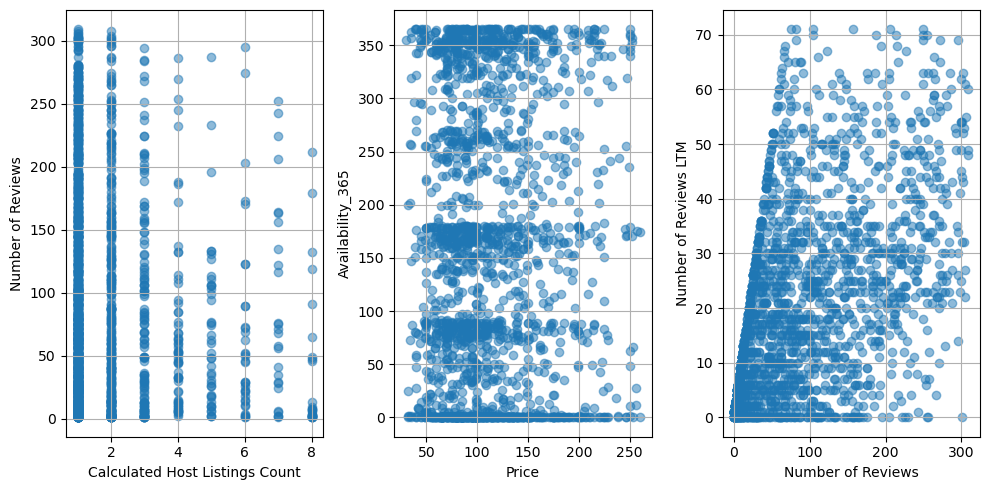

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


class DataAnalysis:
    def __init__(self):
        pass
    # the function that reads and handles the missing values
    def read_and_handle(self):
        DataFile = input('enter the name of the file with extension: ')
        df = pd.read_csv(DataFile)
        #drop columns and rows that have all null values
        nullCol = df.columns[df.isnull().all()]
        df = df.drop(columns=nullCol)
        nullRow = df.index[df.isnull().all(axis=1)]
        df = df.drop(index = nullRow)
        #removing outliers
        df_numCols = df.select_dtypes(include=['number'])
        Q1 = df_numCols.quantile(0.25)
        Q3 = df_numCols.quantile(0.75)
        IQR = Q3 - Q1
        Lbound = Q1 - 1.5 * IQR
        Ubound = Q3 + 1.5 * IQR
        outliers_mask = ((df_numCols >= Lbound) & (df_numCols <= Ubound)).all(axis=1)
        df = df[outliers_mask]
        
        return df

    def descriptive(self, df):
        # Static describe
        print(df.describe())
        #price describtion
        print('Prices:')
        print('Minimum price:', df['price'].min())
        print('Maximum price:', df['price'].max())
        print('Average price:', df['price'].mean())
        #lowest and highest price
        min_price = df[df['price'] == df['price'].min()]
        host_lowest_price = min_price['host_name'].values[0]
        print("Host with the lowest price:", host_lowest_price)
        max_price = df[df['price'] == df['price'].max()]
        host_highest_price = max_price['host_name'].values[0]
        print("Host with the highest price:", host_highest_price)
        # List of neighborhoods with the highest prices
        neighborhoods_prices = df.groupby('neighbourhood')['price'].mean()
        neighborhoods_prices_sorted = neighborhoods_prices.sort_values(ascending=False)
        neighborhoods_highest_prices = neighborhoods_prices_sorted.index.tolist()
        print("List of neighborhoods with the highest prices:", neighborhoods_highest_prices)

    def visualDescription(self, df):
        _, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
        #relationship between calculated_host_listings_count and number_of_reviews
        #Hosts with more listings might have more opportunities for reviews.
        axes[0].scatter(df['calculated_host_listings_count'], df['number_of_reviews'], alpha=0.5)
        axes[0].set_xlabel('Calculated Host Listings Count')
        axes[0].set_ylabel('Number of Reviews')
        axes[0].grid(True)
        #relationship between price and availability_365
        #Listings with higher availability might have lower prices due to increased competition,
        #while listings with limited availability might command higher prices.
        axes[1].scatter(df['price'], df['availability_365'], alpha=0.5)
        axes[1].set_xlabel('Price')
        axes[1].set_ylabel('Availability_365')
        axes[1].grid(True)
        # Relationship between number_of_reviews and number_of_reviews_ltm
        #they might indicate the popularity and consistency of a listing over time.
        axes[2].scatter(df['number_of_reviews'], df['number_of_reviews_ltm'], alpha=0.5)
        axes[2].set_xlabel('Number of Reviews')
        axes[2].set_ylabel('Number of Reviews LTM')
        axes[2].grid(True)
        
        plt.tight_layout()
        plt.show()

#create an instance of the class and use its methods
data_analysis = DataAnalysis()
data = data_analysis.read_and_handle()
data_analysis.descriptive(data)
data_analysis.visualDescription(data)

In [20]:
data


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,763278557466324285,Home in Portland · ★4.92 · 1 bedroom · 1 bed ·...,5386496,I-Hua,Ashcreek,45.467270,-122.729750,Entire home/apt,110.0,1,11,12/12/2023,2.68,1,0,11,City registration pending
1,54342436,Home in Portland · ★5.0 · 2 bedrooms · 2 beds ...,205079895,Mike,Sunnyside,45.518160,-122.618670,Entire home/apt,NaN,2,71,6/13/2023,3.06,11,0,24,City registration pending
2,51554340,Guest suite in Portland · ★4.81 · Studio · 1 b...,95479282,Brandon,Lents,45.481730,-122.573610,Entire home/apt,75.0,4,27,11/10/2023,1.06,1,26,16,2018-245298-000-00-HO
3,39727402,Home in Portland · 2 bedrooms · 1 bed · 3.5 sh...,85532744,Chris,Lents,45.469400,-122.558820,Private room,45.0,31,1,6/30/2021,0.03,1,0,0,NaN
4,691287608005268426,Tiny home in Portland · 1 bedroom · 1 bed · 1 ...,139193165,Will,Lents,45.493010,-122.570860,Entire home/apt,NaN,28,0,NaN,NaN,1,0,0,City registration pending
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4940,645226963346459417,Rental unit in Portland · Studio · 1 bed · 1 bath,263502162,Landing,Portland Downtown,45.518280,-122.681460,Entire home/apt,81.0,30,0,NaN,NaN,50,365,0,NaN
4941,855097881523473366,Home in Portland · 2 bedrooms · 2 beds · 2.5 b...,691959,Leah,Mt. Scott-Arleta,45.483576,-122.587361,Entire home/apt,147.0,30,1,7/1/2023,0.17,1,36,1,NaN
4942,53108500,Home in Portland · ★4.81 · 3 bedrooms · 3 beds...,293772932,Kim,Sunnyside,45.515670,-122.613470,Entire home/apt,120.0,1,157,12/17/2023,6.21,2,0,71,Exempt
4943,35907033,Guest suite in Portland · ★4.91 · 1 bedroom · ...,28880324,Meghan,Concordia,45.570520,-122.625530,Entire home/apt,64.0,1,148,12/5/2023,2.70,1,0,55,City registration pending
